In [255]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import math

from sklearn.gaussian_process import GaussianProcessRegressor

bounds = np.load("../dataset/edh_boundaries.npy")
transients = np.load("../dataset/transients_interp.npy")
set_num = 0

tr1 = np.array_split(transients[set_num, :], 31)
for i, arr in enumerate(tr1):
    tr1[i] = np.mean(arr)
tr1 = np.array(tr1)
bd1 = np.array(range(0, np.max(bounds[set_num, :]), np.max(bounds[set_num, :]) // 31))[1:]
tr1.shape, bd1.shape

((31,), (31,))

([<matplotlib.lines.Line2D at 0x7fdf4b019190>],
 array([0.00120741, 0.00120738, 0.00120736, ..., 0.00188775, 0.00188777,
        0.00188778]),
 2954.810344827586)

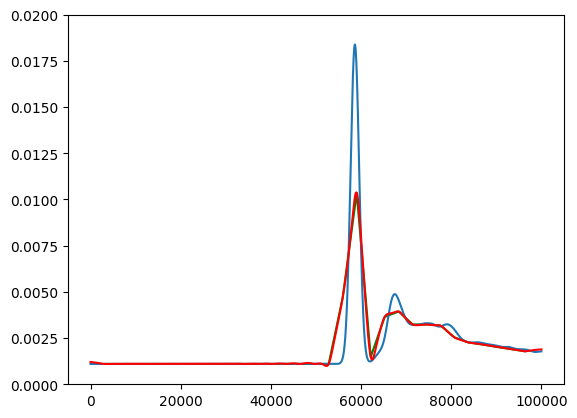

In [267]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

ax = plt.gca()
ax.set_ylim([0, 0.02])
lc = np.mean(np.diff(b_set))
a = np.min(np.diff(b_set)) / np.max(np.diff(b_set))
kernel = RationalQuadratic(length_scale=lc, alpha=a, length_scale_bounds='fixed', alpha_bounds='fixed')
gaussian_reg = GaussianProcessRegressor(kernel=kernel).fit(bd1.reshape(-1, 1), tr1)
x = np.arange(0, 100000)
pred_gauss_vals = gaussian_reg.predict(x.reshape(-1, 1))
plt.plot(bd1, tr1, 'g')
plt.plot(x, transients[set_num, :])
plt.plot(x, pred_gauss_vals, 'r'), pred_gauss_vals, lc

([<matplotlib.lines.Line2D at 0x7fdf4b2ad250>],
 array([0.00138034, 0.00138033, 0.00138031, ..., 0.00205363, 0.00205363,
        0.00205364]),
 2954.810344827586,
 0.06125356125356125)

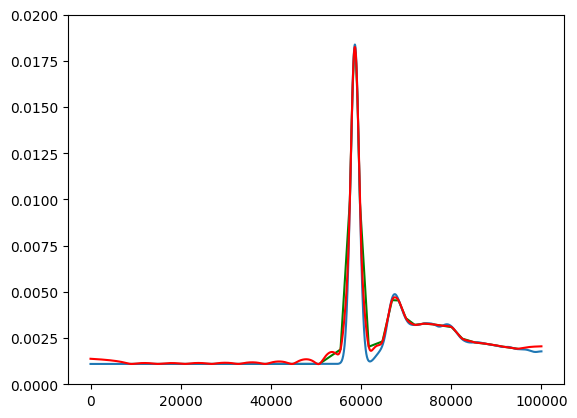

In [262]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic

# Generate x-values
diffs = np.diff(bounds[set_num, :])
b_set = bounds[set_num, :][:-1] + (diffs/2)

# Generate y-values
t_set = []
for i in range(len(b_set)):
    cur_diff = (diffs[i] / diffs[0])
    t_set.append(0.0011 / cur_diff)
t_set = np.array(t_set)

ax = plt.gca()
ax.set_ylim([0, 0.02])
lc = np.mean(np.diff(b_set))
a = np.min(np.diff(b_set)) / np.max(np.diff(b_set))
kernel = RationalQuadratic(length_scale=lc, alpha=a, length_scale_bounds='fixed', alpha_bounds='fixed')
gaussian_reg = GaussianProcessRegressor(kernel=kernel).fit(b_set.reshape(-1, 1), t_set)
x = np.arange(0, 100000)
pred_gauss_vals = gaussian_reg.predict(x.reshape(-1, 1))
plt.plot(b_set, t_set, 'g')
plt.plot(x, transients[set_num, :])
plt.plot(x, pred_gauss_vals, 'r'), pred_gauss_vals, lc, a

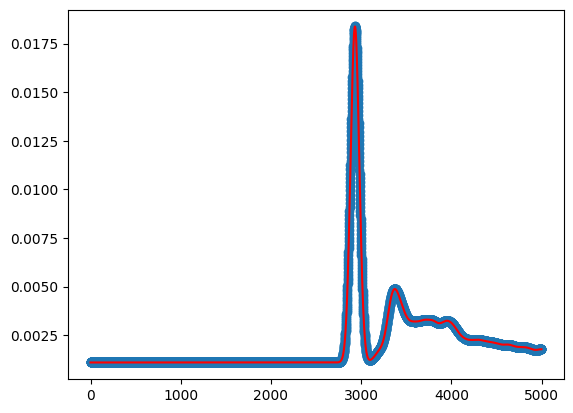

In [6]:
transients_x = np.array(range(len(transients[0, ::20])))
plt.scatter(transients_x, transients[0, ::20])

gaussian_reg.fit(transients_x.reshape(-1, 1), transients[0, ::20])
pred_true_gauss_vals = gaussian_reg.predict(transients_x.reshape(-1, 1))
plt.plot(transients_x, pred_true_gauss_vals, 'r')